In [1]:
import pandas as pd
import csv
import toolbox as tbx

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt

import missingno as msno
from urllib import request
import datetime as dt
import re

from scipy.stats import chi2_contingency
from scipy.stats import shapiro
import scipy.stats as st

import researchpy
from wordcloud import WordCloud
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA

import warnings
warnings.filterwarnings('ignore')


<h1  style= "background-color: gray;
                 color:white;
            text-align: center; 
            font-family:Helvetica, Arial, verdana, sans-serif"> Explo</h1>

In [2]:
df_final = pd.read_csv('/Users/alhassanneahmedap59_cb/oc/P3/data/df_final.csv', low_memory=False)

In [3]:
relevant_data = ['code','product_name','states_en','brands','categories_en', 'countries_en','additives_tags', 
                 'additives_en', 'additives_n', 'nutriscore_score', 'nutriscore_grade','fiber_100g',
                 'salt_100g', 'saturated-fat_100g', 'energy-kcal_100g', 'sugars_100g','proteins_100g',  
                 'pnns_groups_1', 'pnns_groups_2','fruits-vegetables-nuts_100g']

*********************************** Data infos ***********************************
Nombre de colonnes :  20 

Nombre de lignes :  301575 


 ********************************** Valeurs manquantes **********************************


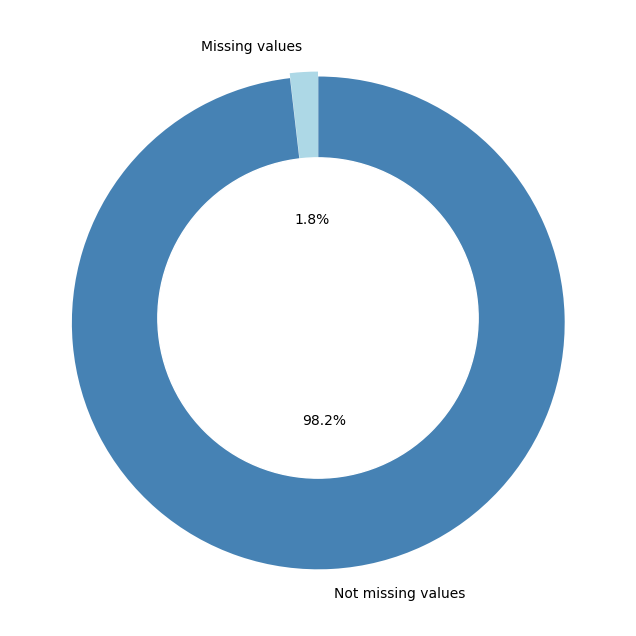

Nombre total de valeurs manquantes :  110491 



In [4]:
df_final = df_final[relevant_data]
tbx.describe_data(df_final)

In [5]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301575 entries, 0 to 301574
Data columns (total 20 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   code                         301575 non-null  object 
 1   product_name                 301212 non-null  object 
 2   states_en                    301575 non-null  object 
 3   brands                       234688 non-null  object 
 4   categories_en                258338 non-null  object 
 5   countries_en                 301575 non-null  object 
 6   additives_tags               301575 non-null  object 
 7   additives_en                 301575 non-null  object 
 8   additives_n                  301575 non-null  float64
 9   nutriscore_score             301575 non-null  float64
 10  nutriscore_grade             301573 non-null  object 
 11  fiber_100g                   301574 non-null  float64
 12  salt_100g                    301575 non-null  float64
 13 

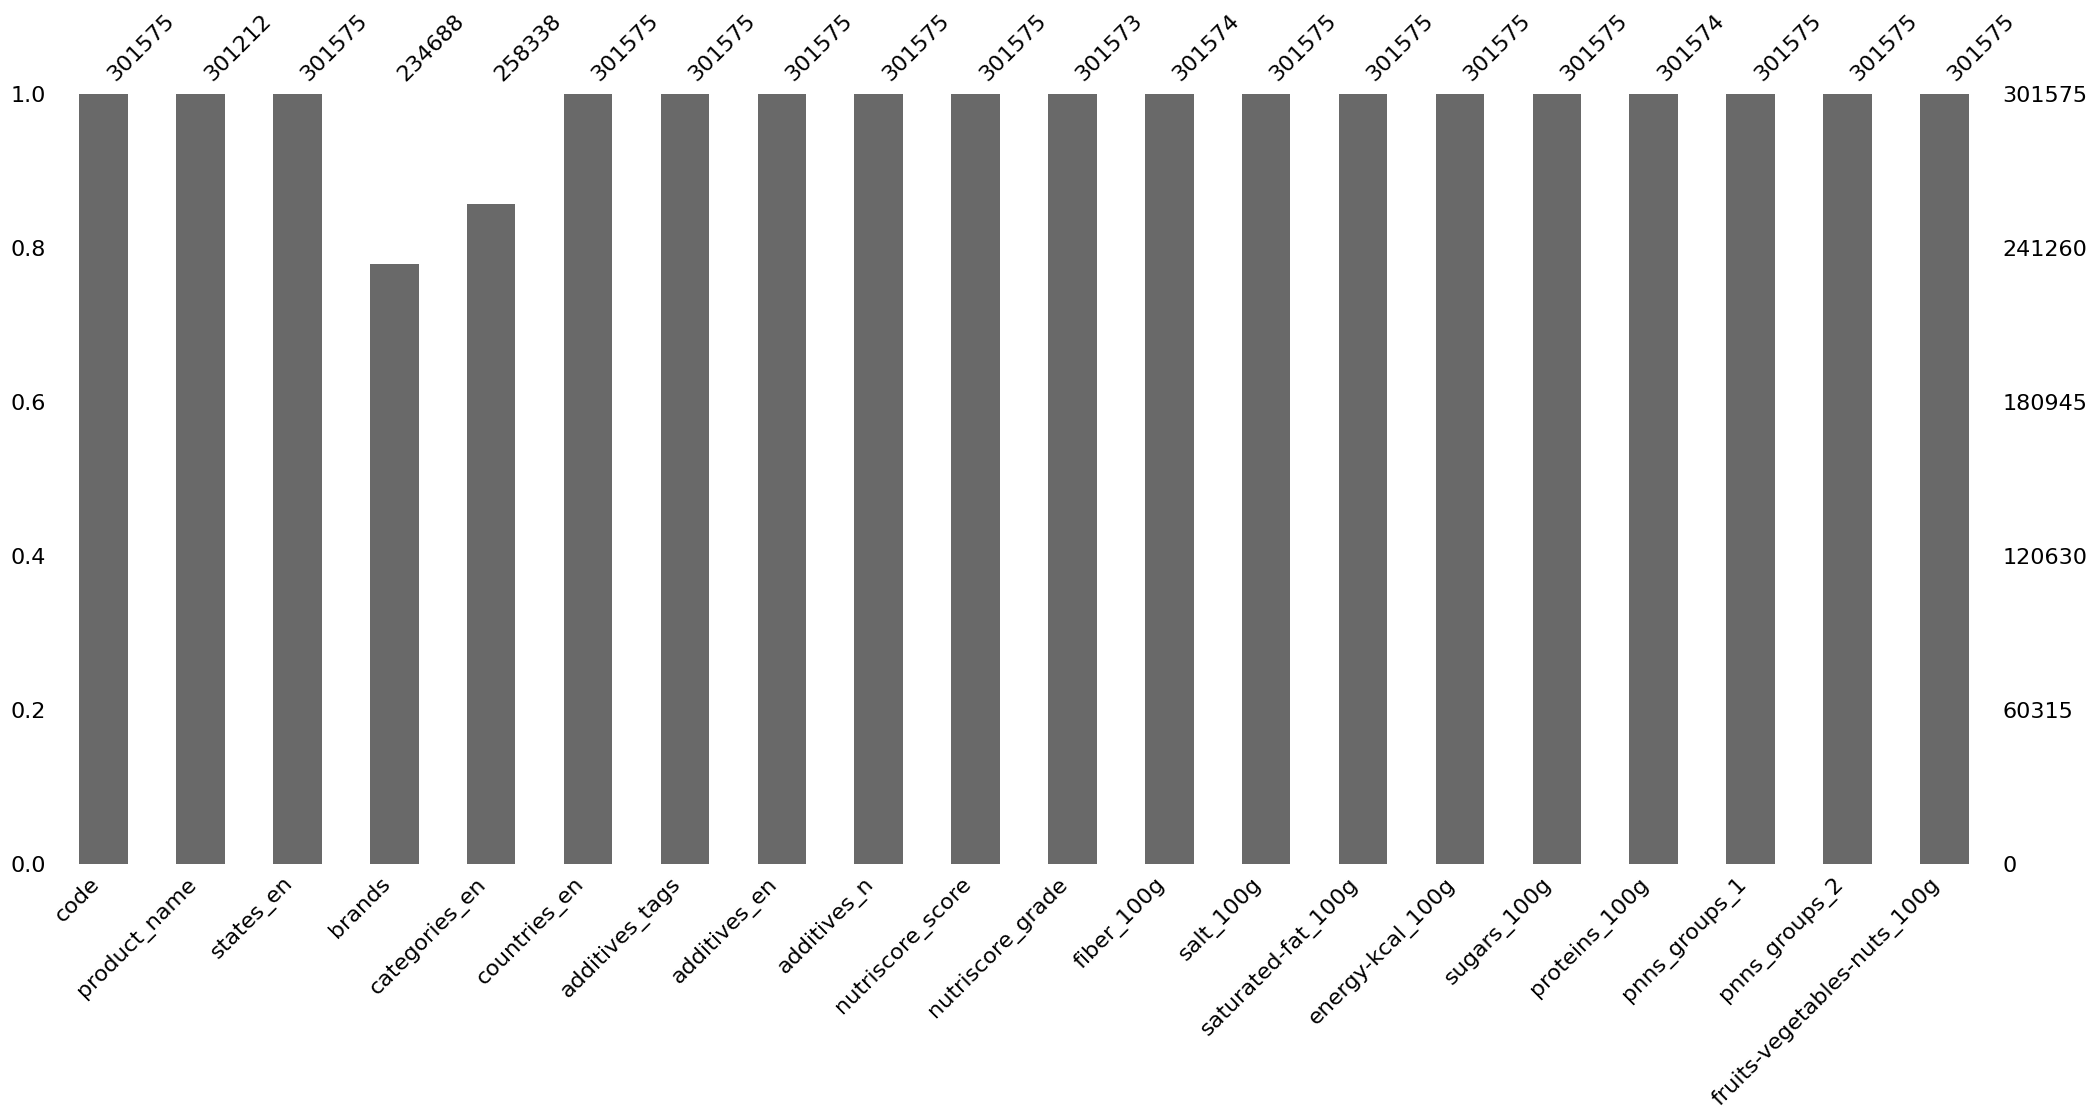

In [6]:
msno.bar(df_final);

In [7]:
numerical_features= list(df_final.select_dtypes(include=["float64","int64"]).columns)

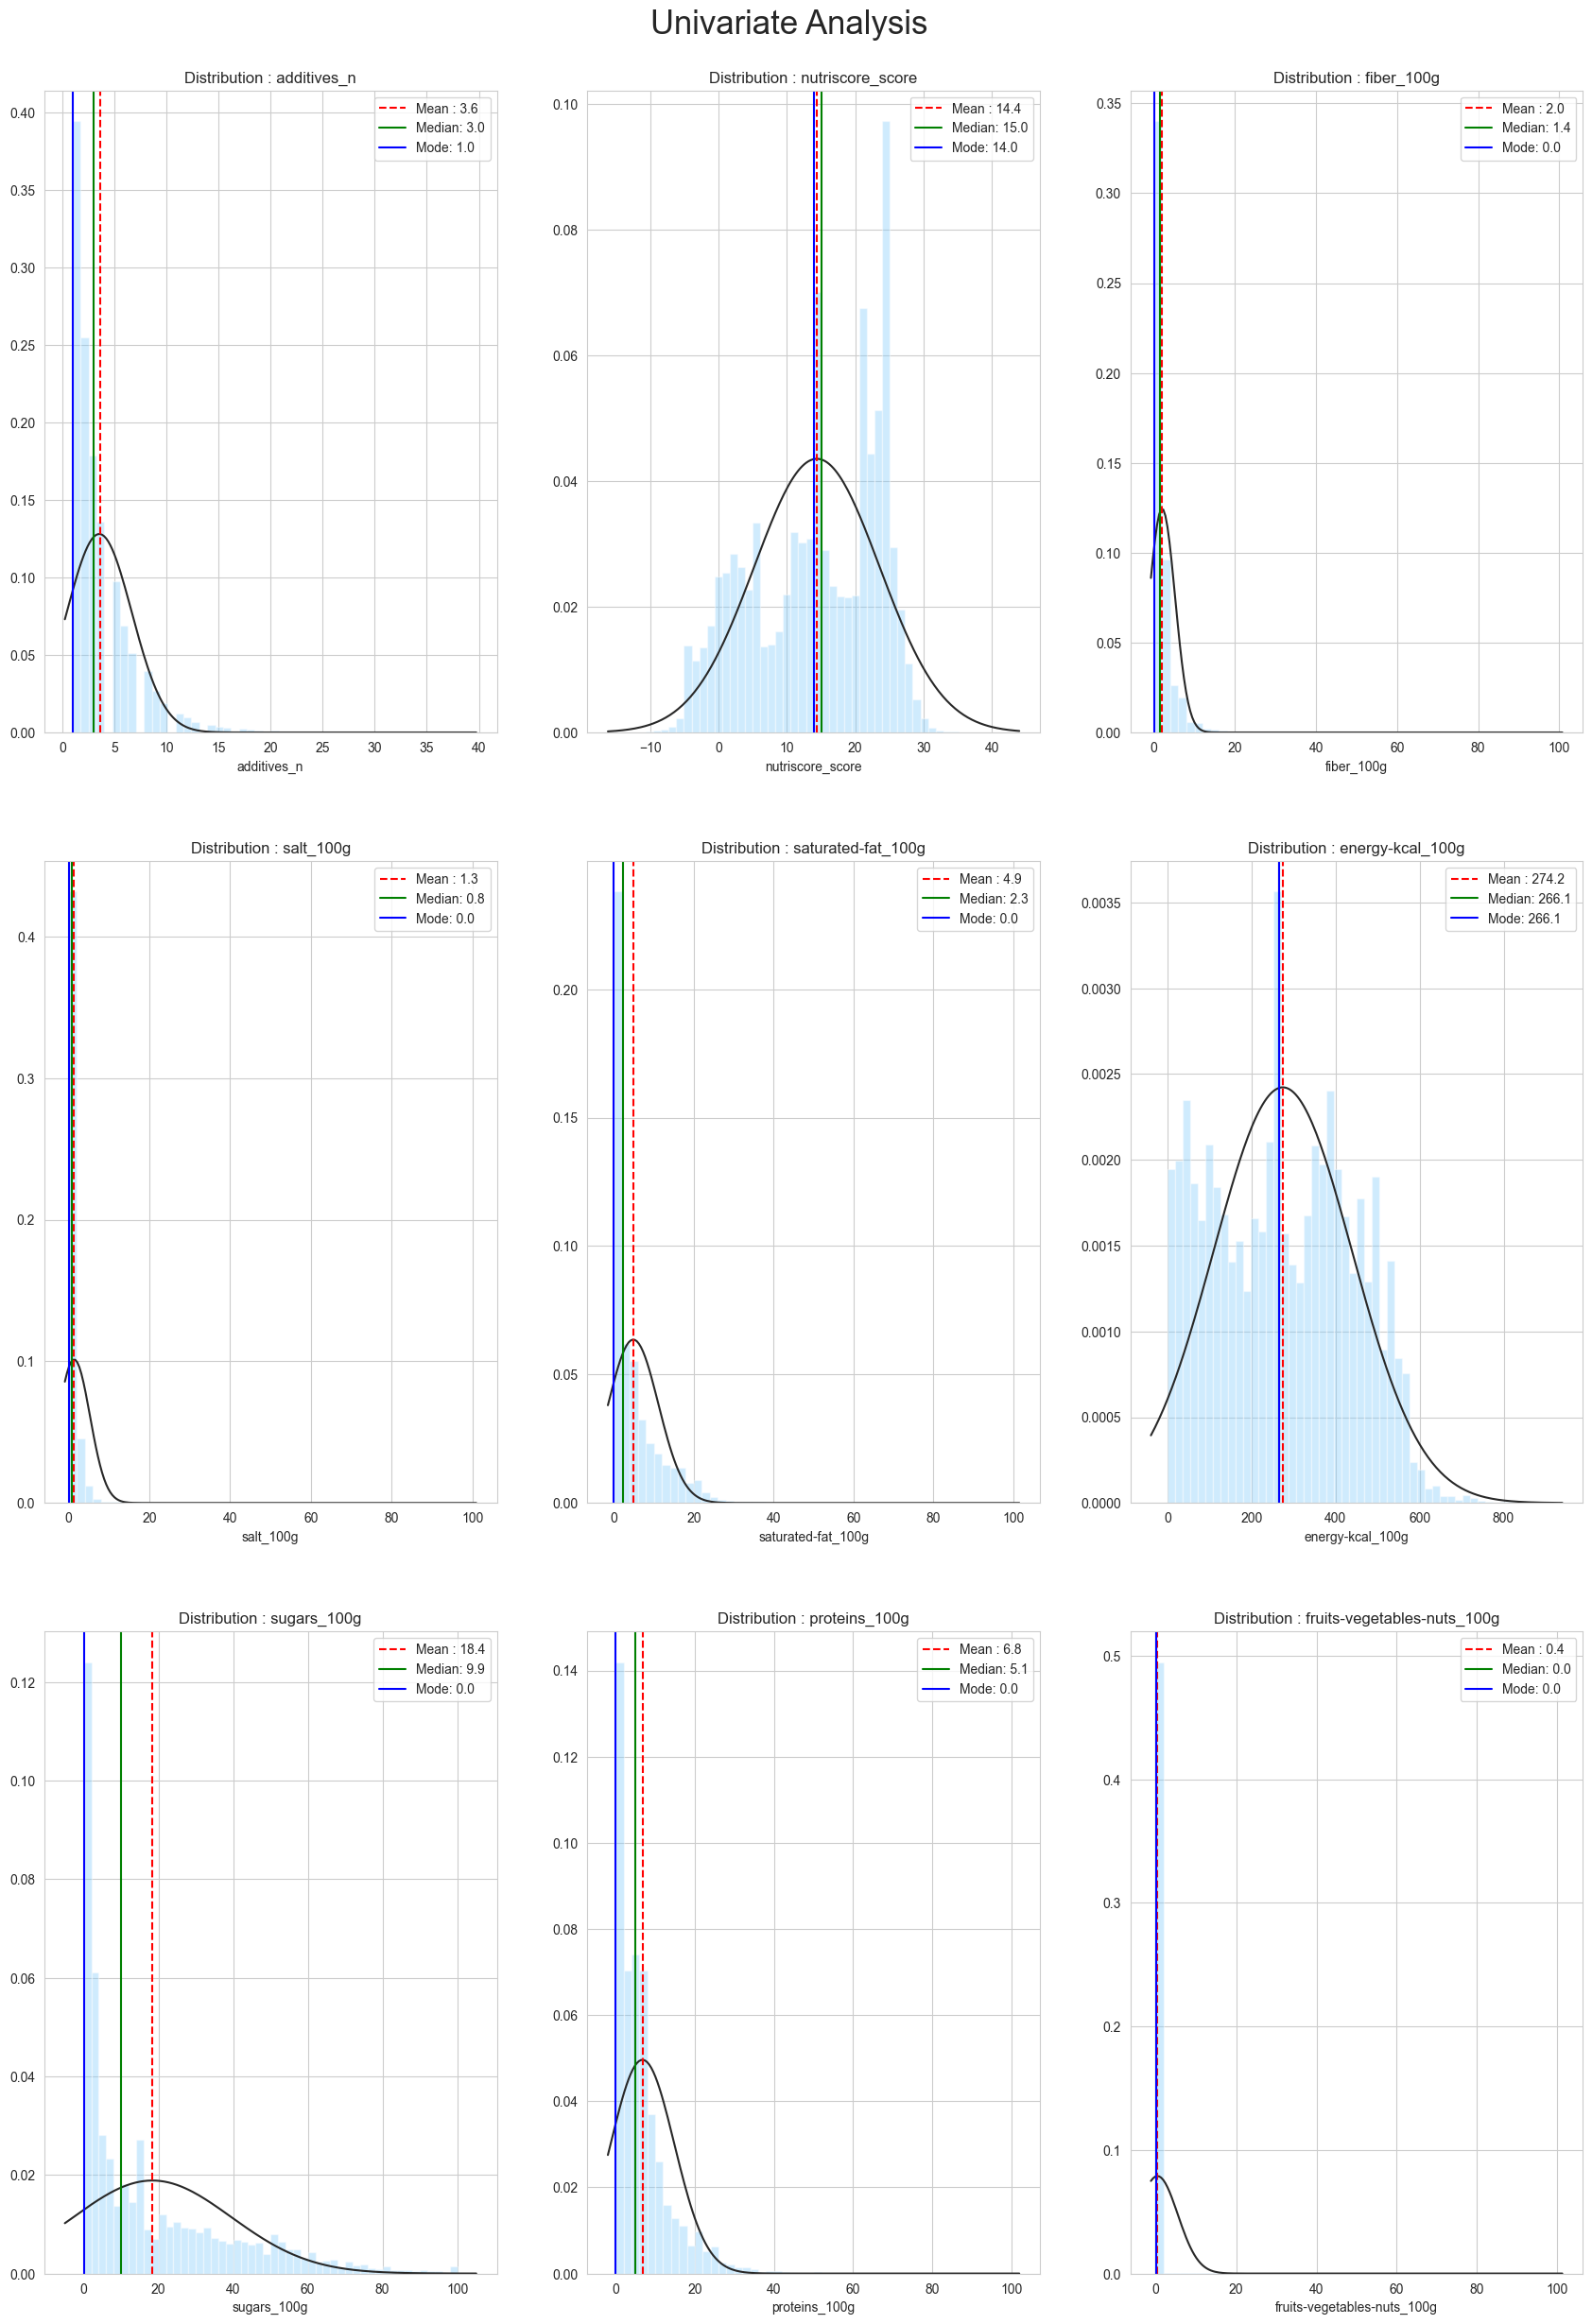

In [8]:
sns.set_style("whitegrid")
fig = plt.figure(figsize=(21,30))
fig.text(0.5, 0.90, "Univariate Analysis", ha="center", fontsize=25 )
#sub = 0
for i in range(len(numerical_features)):
    fig.add_subplot(3,3,i+1)
    left, width = 0, 1
    bottom, height = 0, 1
    right = left + width
    top = bottom + height
    
    colonne = numerical_features[i]
    mean = round(df_final[colonne].mean(), 1)
    median = round(df_final[colonne].median(),1)
    mode = round(df_final[colonne].mode()[0],1)
    ax = sns.distplot(df_final[colonne], fit=st.norm, kde=False, color='LightSkyBlue', )
    ax.set_title("Distribution : {}".format(colonne))
    ax.axvline(mean, color='r', linestyle='--', label='Mean : {}'.format(mean))
    ax.axvline(median, color='g', linestyle='-',label='Median: {}'.format(median))
    ax.axvline(mode, color='b', linestyle='-', label='Mode: {}'.format(mode))
    ax.legend()
    #sub += 1
plt.show()

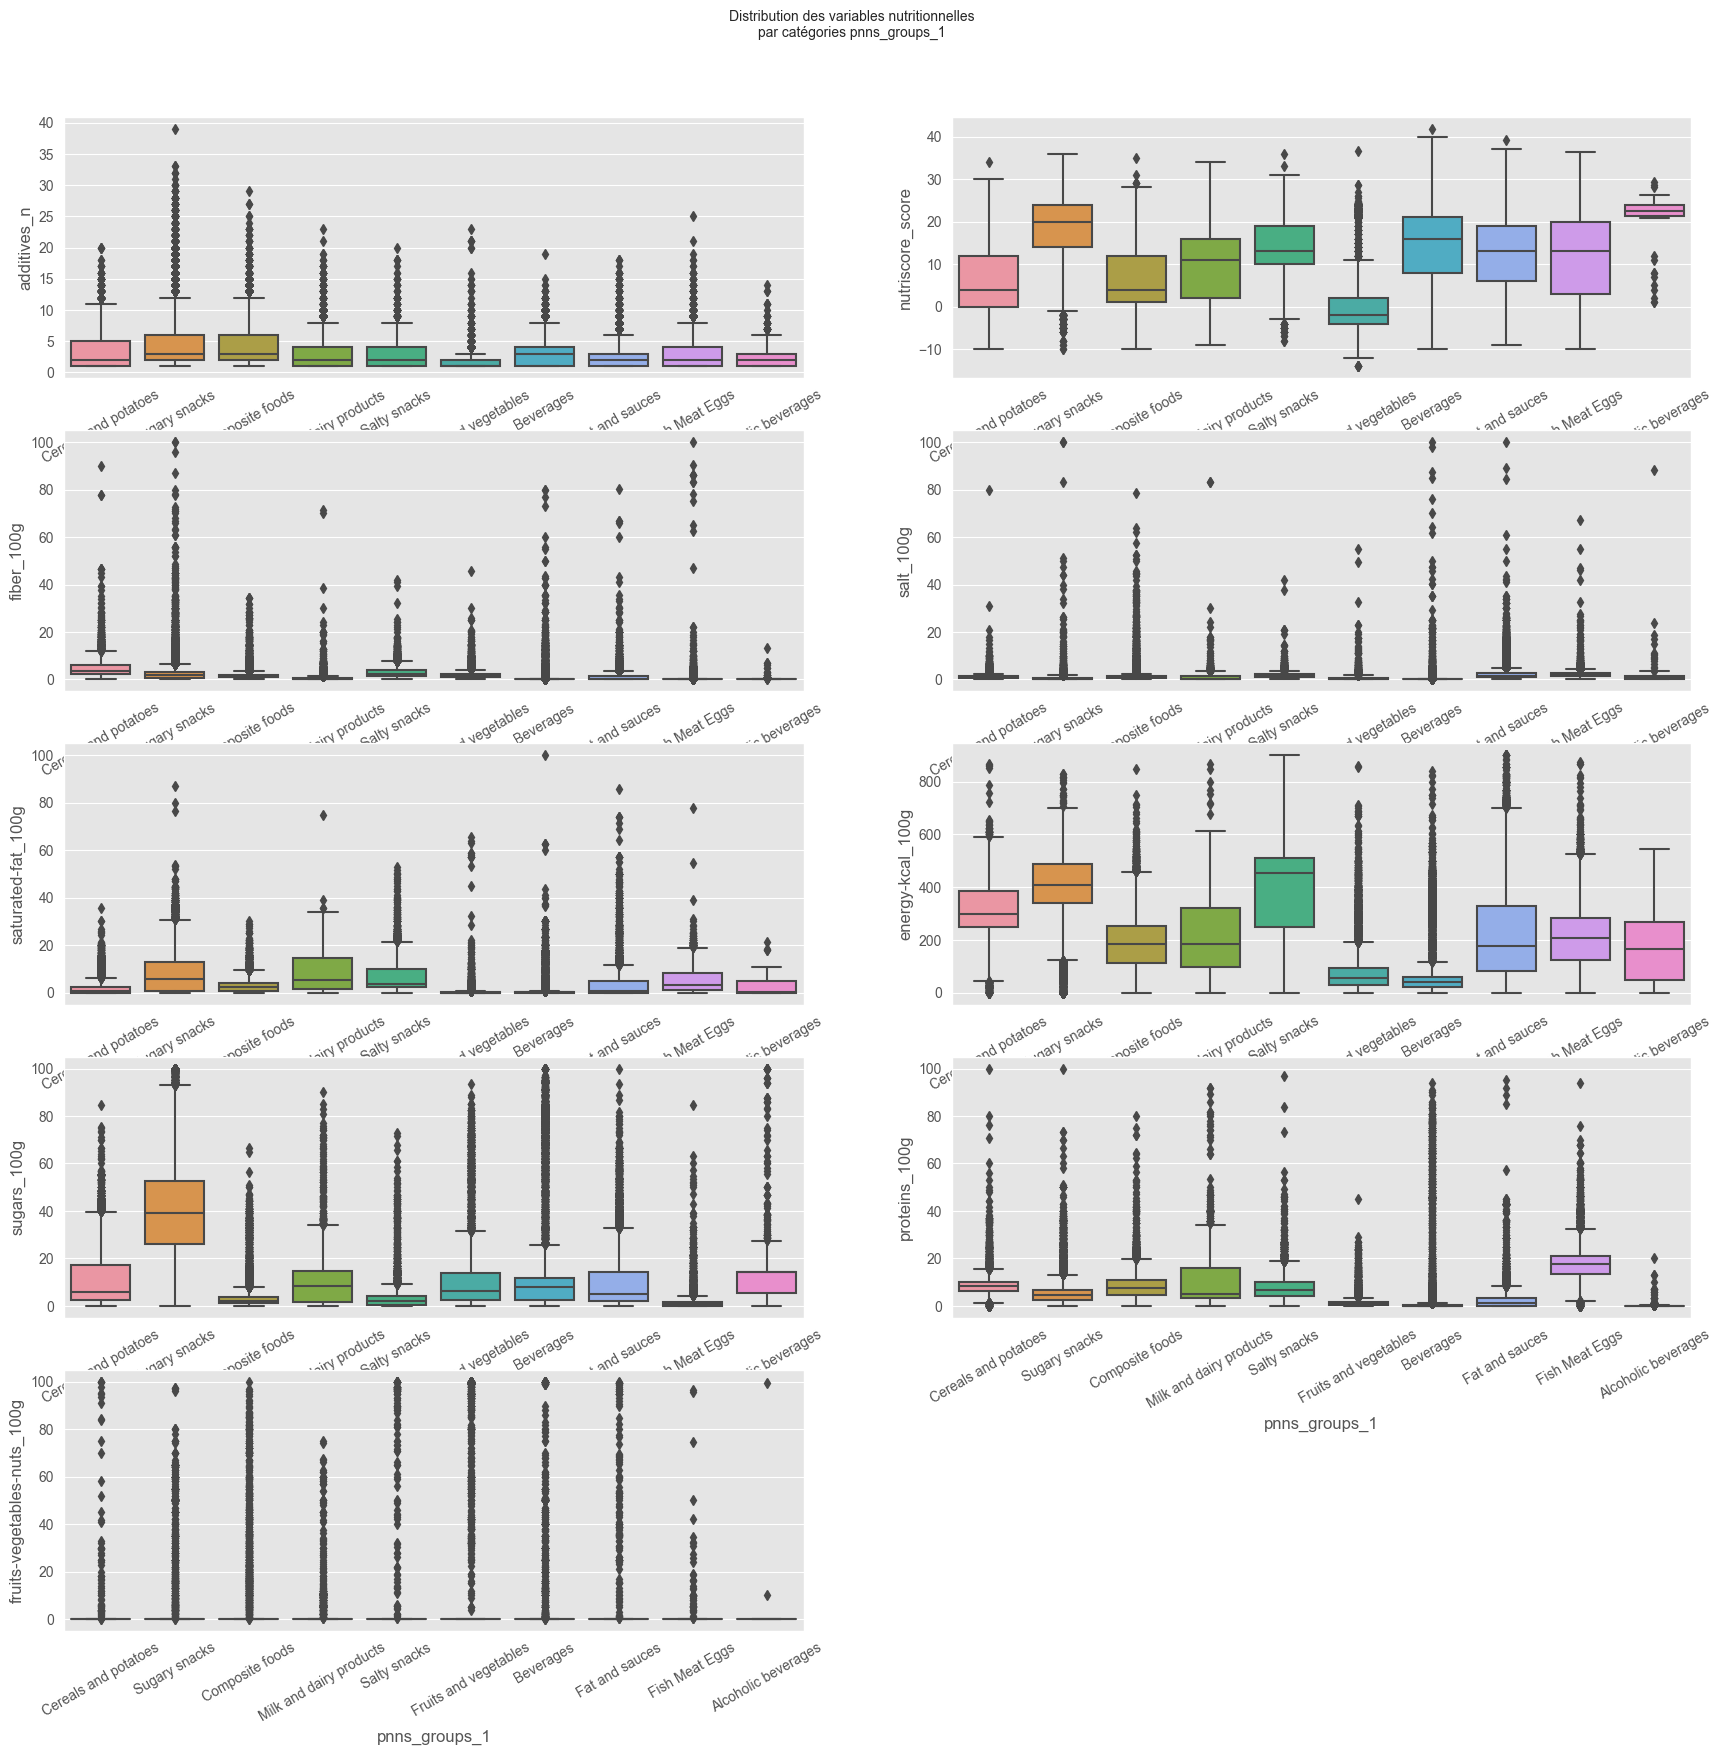

In [9]:
plt.style.use('ggplot')
fig = plt.figure(figsize=(21,40))

sub = 0
for i in range(len(numerical_features)):
    fig.add_subplot(10,2,i+1)
    colonne = numerical_features[i]
    ax = sns.boxplot(x="pnns_groups_1", y=colonne, data=df_final[df_final["pnns_groups_1"]!="unknown"])
    for tick in ax.get_xticklabels():
        tick.set_rotation(30)
    sub += 1

fig.text(0.5, 0.90, r"Distribution des variables nutritionnelles" "\n" "par catégories pnns_groups_1", ha="center", )
plt.show()

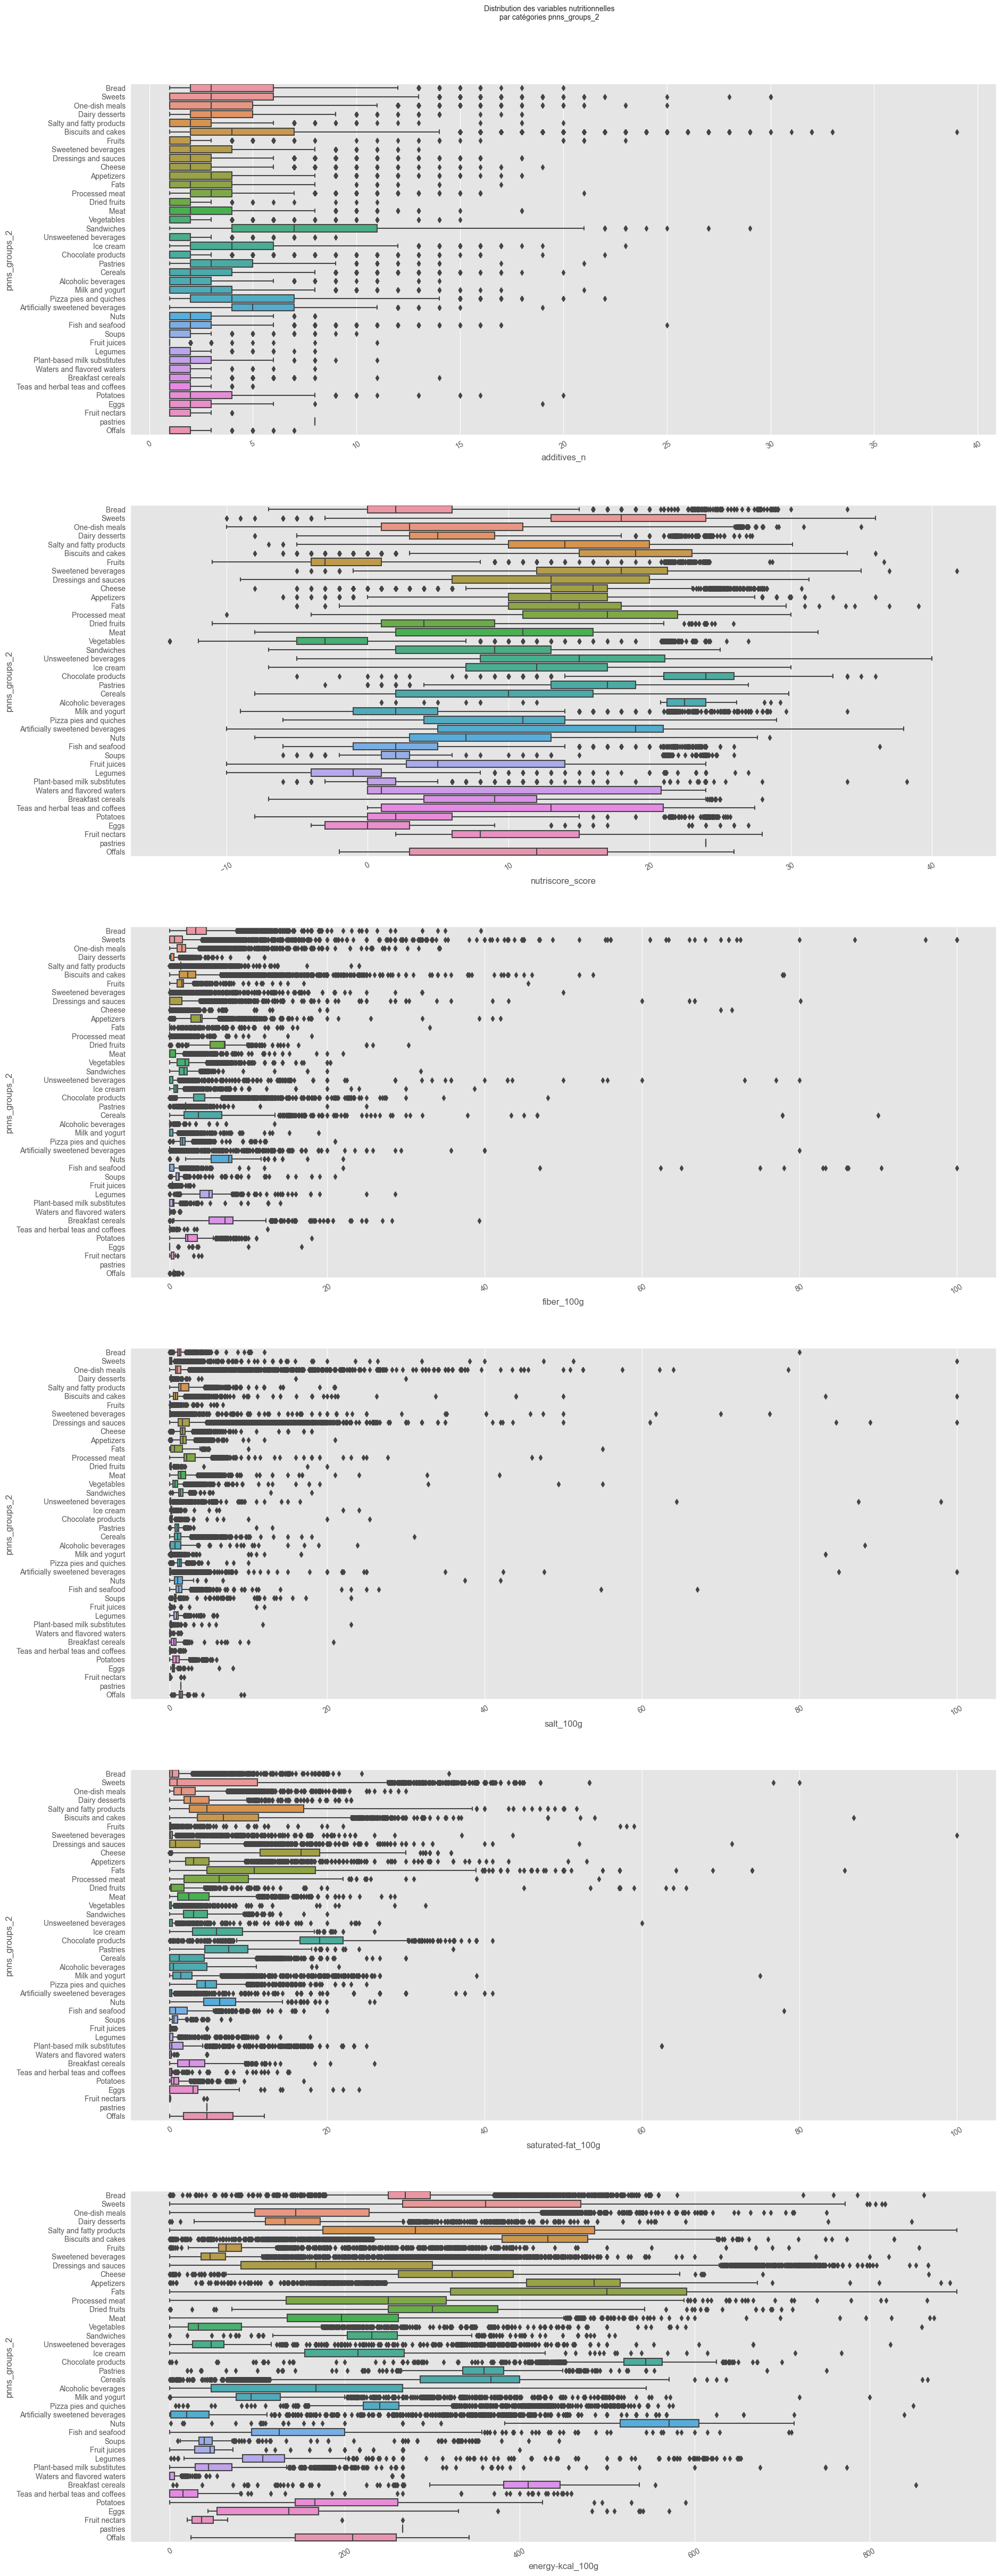

In [10]:
plt.style.use('ggplot')
fig = plt.figure(figsize=(21,60))

sub = 0
for i in range(len(numerical_features[:6])):
    fig.add_subplot(6,1,i+1)
    colonne = numerical_features[i]
    ax = sns.boxplot(y="pnns_groups_2", x=colonne, data=df_final[df_final["pnns_groups_2"]!="unknown"])
    for tick in ax.get_xticklabels():
        tick.set_rotation(30)
    sub += 1

fig.text(0.5, 0.90, r"Distribution des variables nutritionnelles" "\n" "par catégories pnns_groups_2", ha="center", )
plt.show()

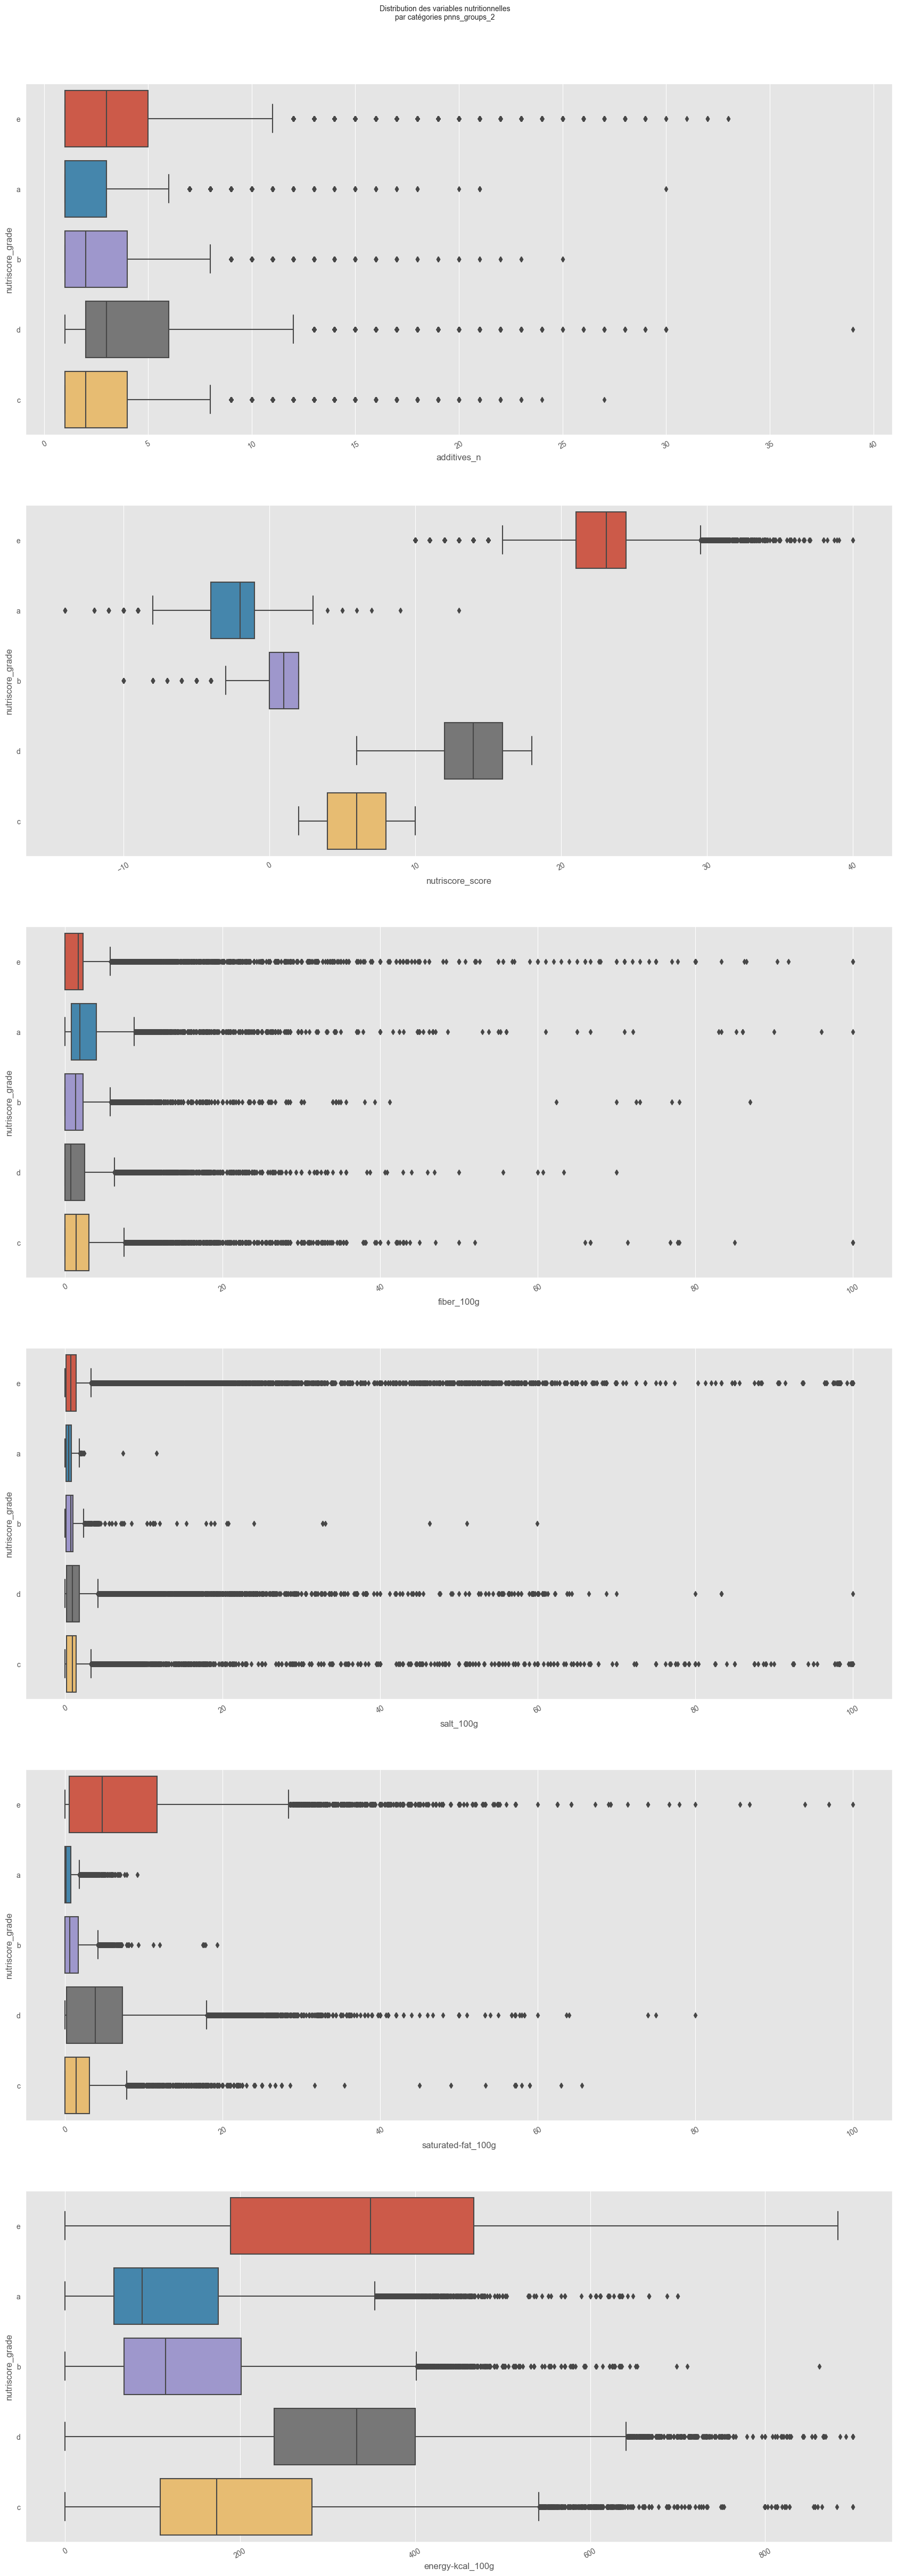

In [11]:
plt.style.use('ggplot')
fig = plt.figure(figsize=(21,60))

sub = 0
for i in range(len(numerical_features[:6])):
    fig.add_subplot(6,1,i+1)
    colonne = numerical_features[i]
    ax = sns.boxplot(y="nutriscore_grade", x=colonne, data=df_final)
    for tick in ax.get_xticklabels():
        tick.set_rotation(30)
    sub += 1

fig.text(0.5, 0.90, r"Distribution des variables nutritionnelles" "\n" "par catégories pnns_groups_2", ha="center", )
plt.show()

In [12]:
df_final['nutriscore_grade'].replace('nan','e', inplace=True)

## Correlations tests

In [13]:
for elem in numerical_features:
    # test de normalité
    tbx.shapiro_test(x=df_final[elem], alpha=0.05)
    


					 TEST DE LA NORMALITE (TEST DE SHAPIRO) 



    	##### 0. Hypothèse du test #####

    H0 : additives_n suit une loi normale 

    H1 : additives_n ne suit pas une loi normale 

    	##### 1. Paramètre du test de Shapiro #####

    Variable aléatoire étudiée : additives_n

    Indice de confiance : 0.05

    Taille de l'échantillon : 301575

    	 #### 2. Résultat du test ####

    p-value de shapiro : 0.0

    coefficient de shapiro : 0.7744436264038086
 
    	 #### 3. Conclusion du test ####

L'hypothèse nulle est rejetée 	 ==> additives_n ne suit pas une loi normale



					 TEST DE LA NORMALITE (TEST DE SHAPIRO) 



    	##### 0. Hypothèse du test #####

    H0 : nutriscore_score suit une loi normale 

    H1 : nutriscore_score ne suit pas une loi normale 

    	##### 1. Paramètre du test de Shapiro #####

    Variable aléatoire étudiée : nutriscore_score

    Indice de confiance : 0.05

    Taille de l'échantillon : 301575

    	 #### 2. Résultat du test ####

    p-value de

In [14]:
df_final.pnns_groups_1 = df_final.pnns_groups_1.astype(str)
df_final.nutriscore_grade = df_final.nutriscore_grade.astype(str)

### Nutriscore_grade vs pnns_group_1

<strong> Situation : </strong> varibale qualitative vs variable qualitative <br>
<strong> Outils :</strong> Test du khi-deux<br> 
<strong> Outils Intensité du lien</strong>V-Kramer<br> 

In [15]:
df_final.dtypes

code                            object
product_name                    object
states_en                       object
brands                          object
categories_en                   object
countries_en                    object
additives_tags                  object
additives_en                    object
additives_n                    float64
nutriscore_score               float64
nutriscore_grade                object
fiber_100g                     float64
salt_100g                      float64
saturated-fat_100g             float64
energy-kcal_100g               float64
sugars_100g                    float64
proteins_100g                  float64
pnns_groups_1                   object
pnns_groups_2                   object
fruits-vegetables-nuts_100g    float64
dtype: object


					 TEST D'INDEPENDANCE DU CHI-2 




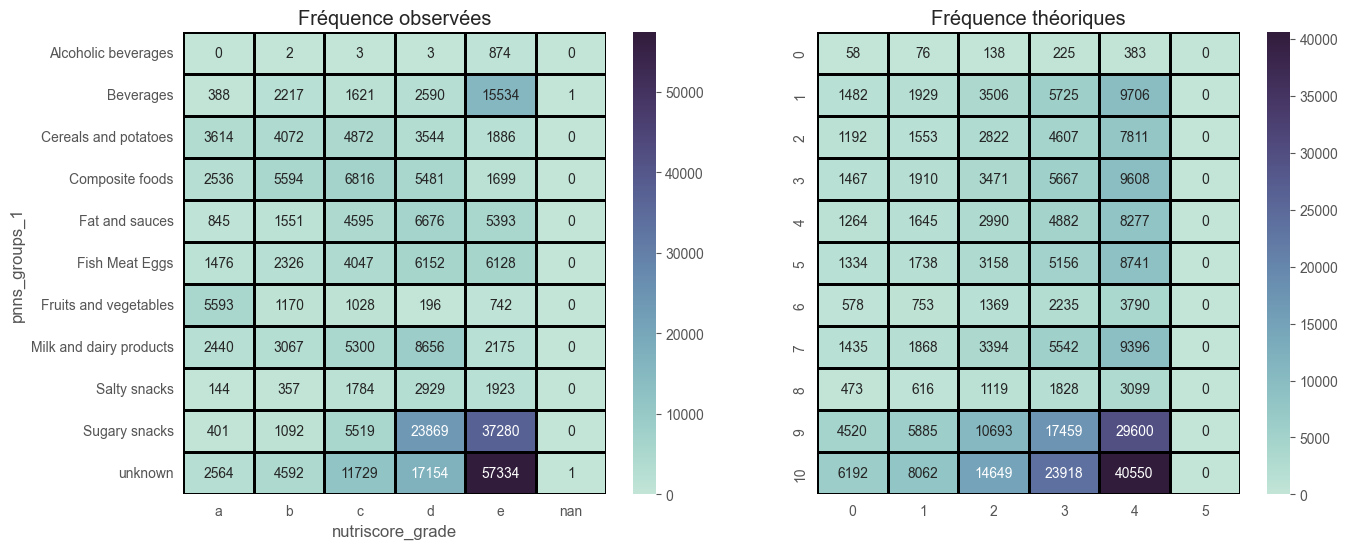


    		 ##### 0. Hypothèse du test  ##### 

    H0 : pnns_groups_1 et nutriscore_grade sont indépendantes 

    H1 : pnns_groups_1 et nutriscore_grade sont corrélées 
 
    
		 ##### 1. Paramètre du test ##### 
    Variables aléatoires étudiées : pnns_groups_1 et nutriscore_grade

    Indice de confiance alpha : 0.05 

    Degré de liberté : 50

    
		 ##### 2. Résultat du test du Qui-2  ##### 

    Coefficient du qui-2 : 132460.85728387084

    p-value calculée : 0.0

    
		 ##### 3. Conclusion du test  ##### 
    
H0 est rejetée : pnns_groups_1 et nutriscore_grade sont corrélées significativement




					 TEST DE SIGNIFICATIVITE DE V CRAMER 


Le coefficient de Cramer est de : 0.2964 

    L'intensité du lien entre les variables est moyen





In [16]:
tbx.chi2test(data=df_final, x='pnns_groups_1', y='nutriscore_grade', alpha=0.05)

### saturated-fat vs energy-kcal

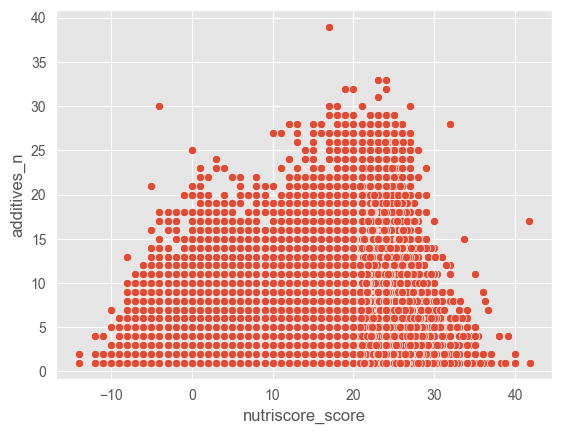

In [17]:
sns.scatterplot(data=df_final, y='additives_n', x='nutriscore_score')
plt.show()


Le scatterplot ne permet pas determiner si il existe une corélation entre ces deux variables. Un test de corrélation nous en dira plus.
 élévée.</div> <br>

<strong> Situation : </strong> varibale quantitative vs variable quantitative <br>
<strong> Outils :</strong> Pearson, Spearman, Kendall et Student<br> 
<strong> Prérequis Pearson : </strong> distriutions normales et lien linéaire <br> 
<strong> Prérequis Spearman : </strong>  liason monotone (robuste aux outliers, fonctionne sur les distributions non linéaires) <br>
<strong> Outils test de significativité:</strong> Student, pvalue<br> 
<strong> Prérequis Student : </strong> distriutions normales et égalités des variances<br> 
<strong> Rejet de H0 : </strong> 𝑝𝑉𝑎𝑙𝑒𝑢𝑟 < 𝛼 </div>

<div class="alert-warning"
     style="margin: auto;  
            font-family:Helvetica, Arial, verdana, sans-serif"> Les deux variables ne suivent pas de lois normales => test de spearman</div> <br>

In [18]:
for elem in numerical_features:
    tbx.spearman_test(x=df_final['additives_n'], y=df_final[elem], alpha=0.05)


					  TEST D'INDEPENDANCE DE SPEARMAN  


	##### 0. Hypothèse du test #####

    H0 : Les variables ('additives_n', 'additives_n') sont indépendantes

    H1 : Les variables ('additives_n', 'additives_n') sont corrélées

    	##### 1. Paramètre du test #####

    Variables aléatoires étudiées : ('additives_n', 'additives_n')

    Indice de confiance : 0.05

    Taille de l'échantillon : 301575

    	 #### 2. Résultat du test ####

    coefficient de Spearman : 1.0

    p-value associée au test de Spearman : 0.0

    	 #### 3. Conclusion du test ####


 --> ('additives_n', 'additives_n') présentent significativement une très forte corrélation positive.

					  TEST D'INDEPENDANCE DE SPEARMAN  


	##### 0. Hypothèse du test #####

    H0 : Les variables ('additives_n', 'nutriscore_score') sont indépendantes

    H1 : Les variables ('additives_n', 'nutriscore_score') sont corrélées

    	##### 1. Paramètre du test #####

    Variables aléatoires étudiées : ('additives_n', 'nutriscore_sc

### nutriscore_grade vs additives_n

<strong> Situation : </strong> varibale quantitative vs variable qualitative <br>
<strong> Outils :</strong> Anova<br> 
<strong> Rejet de H0 : </strong> 𝑝𝑉𝑎𝑙𝑒𝑢𝑟 < 𝛼 </div>

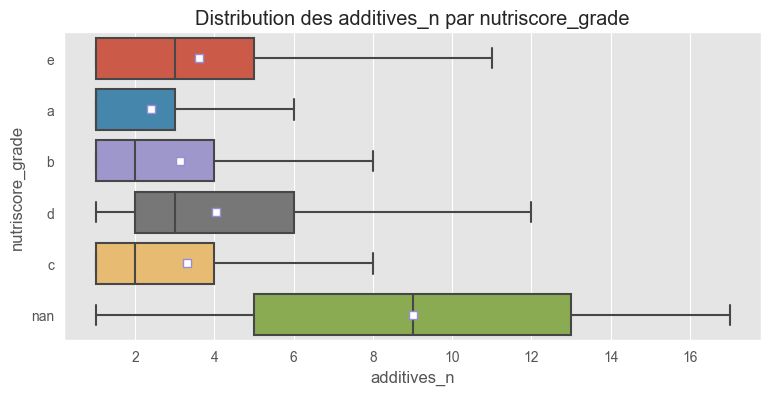

Test ANOVA entre additives_n et nutriscore_grade
	 Hypoyhèse nulle H0 : 	 	 Le nombre d'additifs n'affecte pas le nutriscore_grade (mêmes moyennes).
	 Hypoyhèse alternative H1 : 	 Au moins un nutriscore_grade a une moyenne d'additives_n significativement différente.

Table ANOVA :


,sum_sq,df,F,PR(>F)
nutriscore_grade,1616.408018,4.0,42.14384,4.200507e-35
Residual,95838.431982,9995.0,NaN,NaN


p-value : 4.2005065467768124e-35
L'hypothèse nulle est rejetée 	 ==> H1: Au moins un nutriscore_grade a une moyenne d'additives_n significativement différente.


In [19]:
plt.figure(figsize=(9,4))

meanprops={ "marker" : "s", "markerfacecolor" : "w"}
sns.boxplot(data=df_final, y='nutriscore_grade', x='additives_n', orient='h', showfliers=False, showmeans=True, meanprops=meanprops)
plt.title('Distribution des additives_n par nutriscore_grade');
plt.show()

sample = df_final.sample(10000)
# Test ANOVA
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols


model = smf.ols('additives_n ~ nutriscore_grade', data=sample).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print('Test ANOVA entre additives_n et nutriscore_grade')
print("\t Hypoyhèse nulle H0 : \t \t Le nombre d'additifs n'affecte pas le nutriscore_grade (mêmes moyennes).")
print("\t Hypoyhèse alternative H1 : \t Au moins un nutriscore_grade a une moyenne d'additives_n significativement différente.")
print('')
print('Table ANOVA :')
display(anova_table)

p_value = anova_table['PR(>F)'][0]
print('p-value :', p_value)

if p_value < 0.05:
    print("L'hypothèse nulle est rejetée \t ==> H1: Au moins un nutriscore_grade a une moyenne d'additives_n significativement différente.")
else:
    print("On ne peut pas rejeter l'hypothèse nulle H0 (Le nombre d'additifs n'affecte pas le nutriscore_grade).")


In [20]:
numerical_features

['additives_n',
 'nutriscore_score',
 'fiber_100g',
 'salt_100g',
 'saturated-fat_100g',
 'energy-kcal_100g',
 'sugars_100g',
 'proteins_100g',
 'fruits-vegetables-nuts_100g']

In [21]:
df_final[numerical_features].isna().sum()

additives_n                    0
nutriscore_score               0
fiber_100g                     1
salt_100g                      0
saturated-fat_100g             0
energy-kcal_100g               0
sugars_100g                    0
proteins_100g                  1
fruits-vegetables-nuts_100g    0
dtype: int64

In [ ]:
numerical_features.drop()

In [22]:
X = df_final[numerical_features]
X = X.dropna()

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

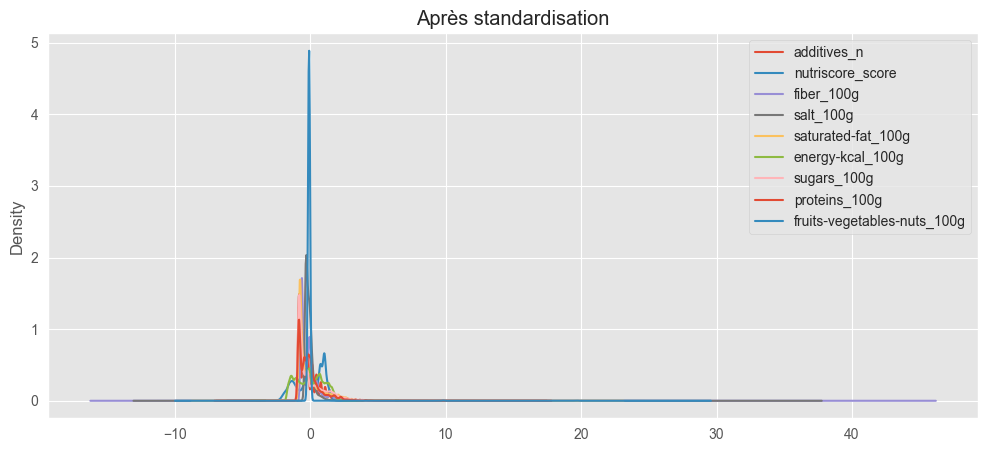

In [23]:
# After standardisation
pd.DataFrame(X_scaled,columns=X.columns).plot(kind='density',sharex=True,figsize=(12,5),layout=(10,1))
plt.title("Après standardisation")
plt.show()

In [24]:
# Create the PCA model
model_pca = PCA(n_components=len(numerical_features))

# Fit the model with the standardised data
X_reduced = model_pca.fit_transform(X_scaled)

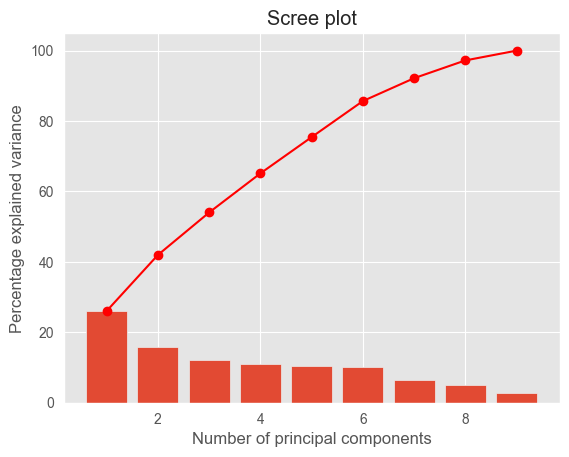

Variance expliquée cumulée : [0.26 0.42 0.54 0.65 0.75 0.86 0.92 0.97 1.  ]


In [31]:
# Scree plot
tbx.display_scree_plot(model_pca)

# Explained variance ratio cumsum
print('\033[1m' +"Variance expliquée cumulée :"+'\033[0m', model_pca.explained_variance_ratio_.cumsum().round(2))

# Nombre de composantes à étudier
num_components = 6
pcs = model_pca.components_ 
pc1 = model_pca.components_[0]
pc2 = model_pca.components_[1]
pc3 = model_pca.components_[2]
pc4 = model_pca.components_[3]
pc5 = model_pca.components_[4]
pc6 = model_pca.components_[5]
pc7 = model_pca.components_[6]
pc8 = model_pca.components_[7]
pc9 = model_pca.components_[8]


classed_data = df_final.copy()
rank_band = [classed_data.loc[note_id, "nutriscore_grade"] for note_id in classed_data.index]
X_projected = model_pca.transform(X_scaled)

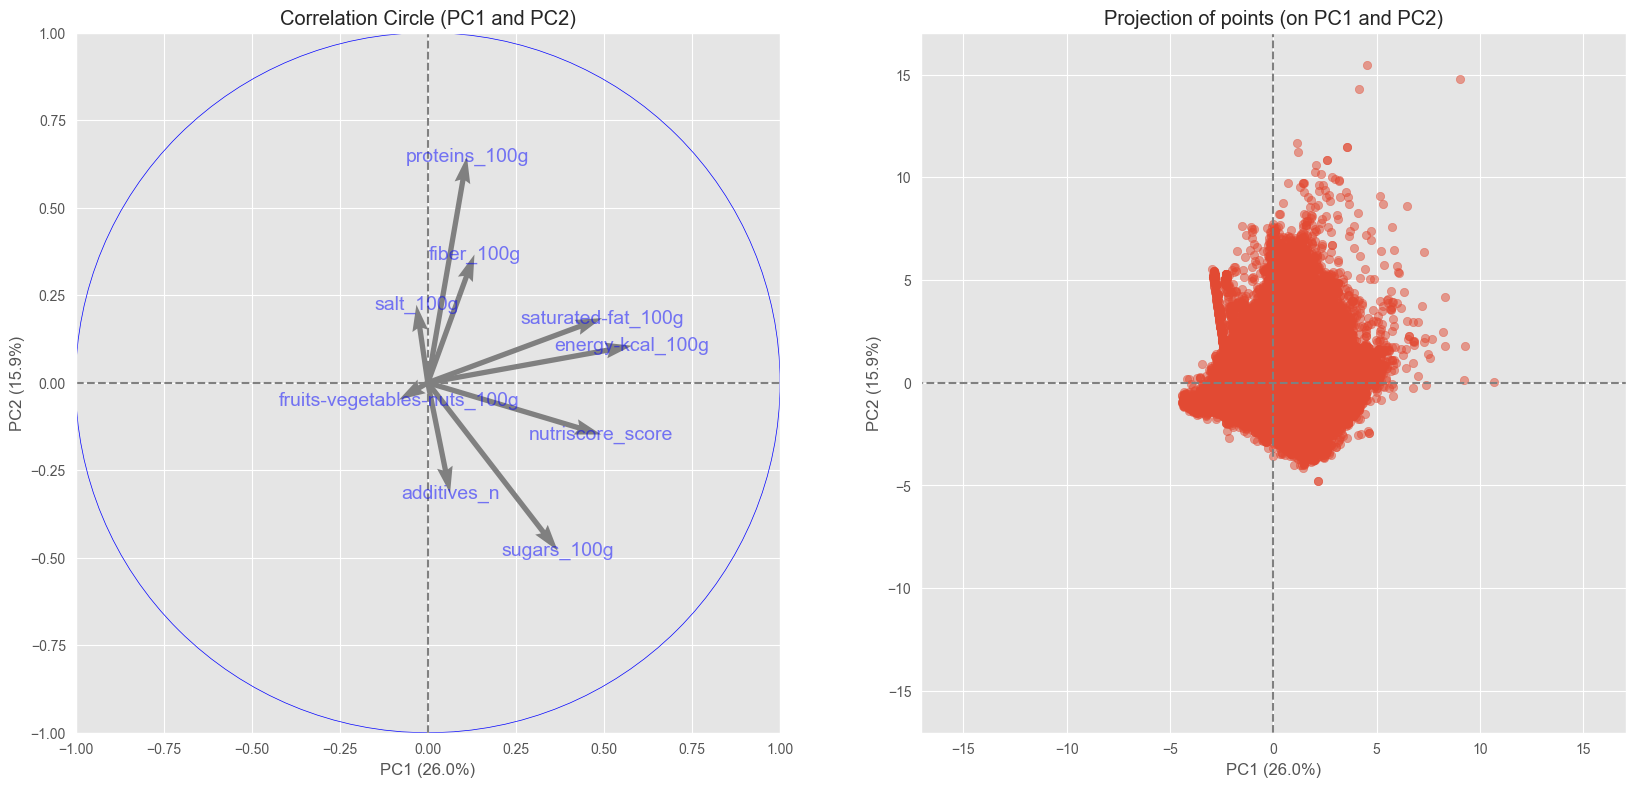

In [32]:
# Cercle des corrélations vs Plan factoriel
plt.figure(figsize=(20,20))
plt.subplot(2,2,1)
tbx.display_circles(pcs, num_components, model_pca, [(0,1)], labels = np.array(X.columns))
plt.subplot(2,2,2)
tbx.display_factorial_planes(X_projected, num_components, model_pca, [(0,1)],  alpha = 0.5)
plt.show()


De manière générale les aliments gras et caloriques ont tendance à avoir un nutriscore plûtot élévé et plutot faible pour les aliments avec des protéines et des fibres.

Les aliments avec beaucoup de sucre contiennent le plus d'additifs et les aliments avec des protéines et fibres contiennent le moins d'additifs.

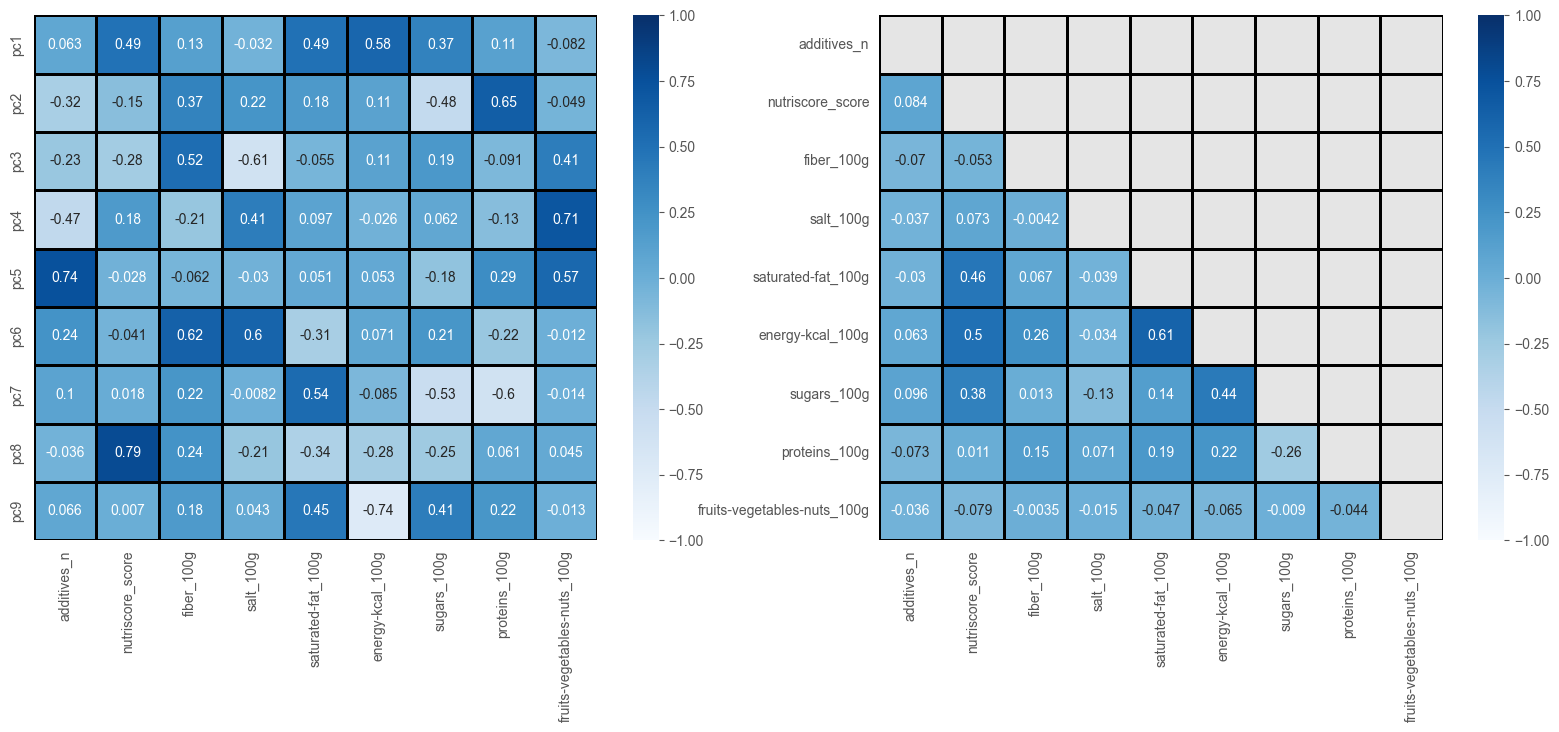

In [35]:
# Matrcices des corrélations
pcs2 = pd.DataFrame(pcs, columns=numerical_features,)
pcs2.index = ["pc1","pc2","pc3", "pc4", "pc5", "pc6","pc7","pc8","pc9"]

plt.figure(figsize=(20,15))
plt.subplot(2,2,1)
sns.heatmap(pcs2, annot=True,linecolor='k', linewidths=2,vmin=-1, vmax=1, cmap="Blues")
plt.subplot(2,2,2)
mask = np.triu(np.ones_like(X.corr(), dtype=bool))
sns.heatmap(X.corr(), mask=mask, vmin=-1, vmax=1, annot=True,linecolor='k', linewidths=2, cmap="Blues")
plt.show()

Les variables nutriscore_score, saturated-fat_100g et energy-kcal_100g  contribuent le plus sur la première composante principale (PC1)
proteins_100 est très corélée avec pc2
cf. tableau de corrélations des composantes principales ci dessus ainsi que le cercle de corrélation.


# Additives Analysis

Il exisite 4 catégories d'additifs, à savoir:
- E100 : colorants
- E200 : conservateurs
- E300 : agents anti-oxygène
- E400 : agents de textures

In [22]:
# https://www.quechoisir.org/action-ufc-que-choisir-additifs-alimentaires-87-molecules-a-eviter-n59897/
# https://www.les-additifs-alimentaires.com/liste-tous-danger.php
    
additifs = pd.read_csv("/Users/alhassanneahmedap59_cb/oc/project_3/data/additifs.csv")
additifs = additifs[['N°', 'Nom', 'Famille', 'Note']].dropna()
additifs.rename(columns={'N°':'Numero'}, inplace=True)
additifs = additifs.drop_duplicates(subset='Numero', keep='last')
additifs['Numero']=additifs['Numero'].str.replace('E','e')
additifs.head()

,Numero,Nom,Famille,Note
0,e100,Curcumine,Colorants Jaune,Sans danger
1,e100i,Curcumine,Colorants Jaune,Sans danger
2,e100ii,Curcuma,Colorants Jaune,Sans danger
3,e101,Vitamine G,Colorants Jaune,Sans danger
4,e101i,Riboflavin,Colorants Jaune,Sans danger


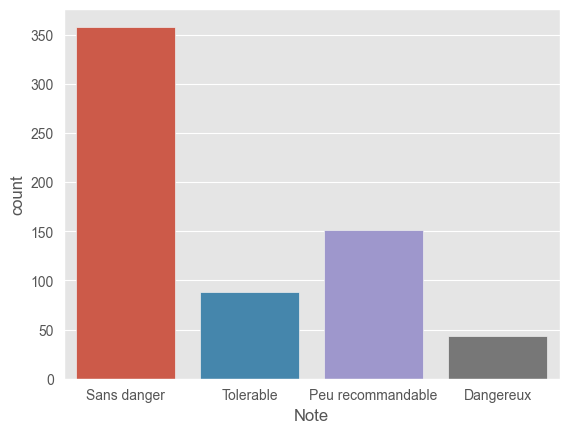

In [23]:
sns.countplot(data=additifs, x='Note');

In [24]:
additifs.Numero.replace(['E'],['e'], inplace=True)
additifs

,Numero,Nom,Famille,Note
0,e100,Curcumine,Colorants Jaune,Sans danger
1,e100i,Curcumine,Colorants Jaune,Sans danger
2,e100ii,Curcuma,Colorants Jaune,Sans danger
3,e101,Vitamine G,Colorants Jaune,Sans danger
4,e101i,Riboflavin,Colorants Jaune,Sans danger
...,...,...,...,...
704,e386,Ethylène-diamine-tétra-acètate disodique,Anti-oxydants,Dangereux
705,e924,Bromate de potassium,Divers,Dangereux
706,e924a,Bromate de potassium,Divers,Dangereux
707,e924b,Bromate de calcium,Divers,Dangereux


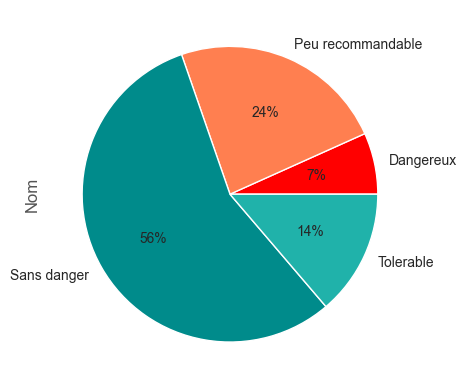

Sans danger          358
Peu recommandable    151
Tolerable             88
Dangereux             43
Name: Note, dtype: int64


In [25]:
additifs.groupby('Note').count()['Nom'].plot(kind='pie',
                                             colors=['red', 'coral','DarkCyan','LightSeaGreen'],
                                             autopct='%1.0f%%',wedgeprops = { 'linewidth' : 1, 'edgecolor' : 'white' })
plt.show()
print(additifs['Note'].value_counts())

In [26]:
additifs2 = additifs.groupby(['Famille','Note']).count()['Nom'].reset_index()
additifs3 = additifs2.copy()
additifs3 = additifs3.pivot_table(index=['Famille'],columns=['Note'], fill_value=0, )
additifs3.columns = ['Dangereux', 'Peu recommandable','Sans danger', 'Tolerable']

additifs3['Total'] = additifs3['Dangereux']+additifs3['Peu recommandable']+additifs3['Sans danger']+additifs3['Tolerable']
additifs3.head()

,Dangereux,Peu recommandable,Sans danger,Tolerable,Total
Famille,,,,,
Acidifiants,1,6,88,18,113
Anti-oxydants,4,2,42,0,48
Colorants,0,0,0,1,1
Colorants Blanc,0,1,3,0,4
Colorants Bleu,0,3,2,0,5


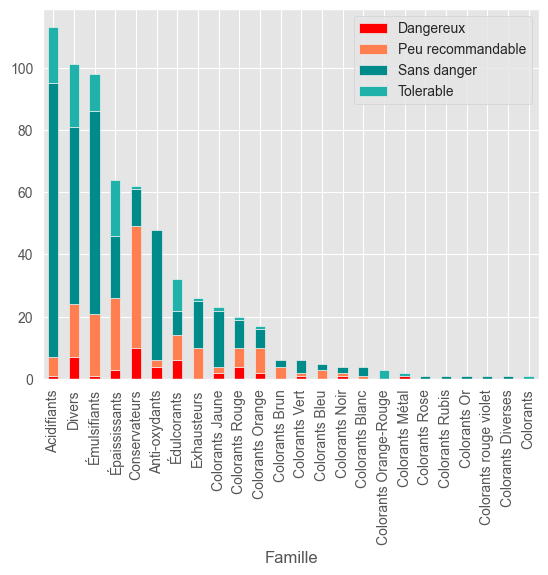

In [27]:
additifs3.sort_values('Total', ascending=False)[['Dangereux', 'Peu recommandable','Sans danger', 'Tolerable']].plot(kind='bar', stacked=True, color=['red', 'coral','DarkCyan','LightSeaGreen'],)
plt.show()

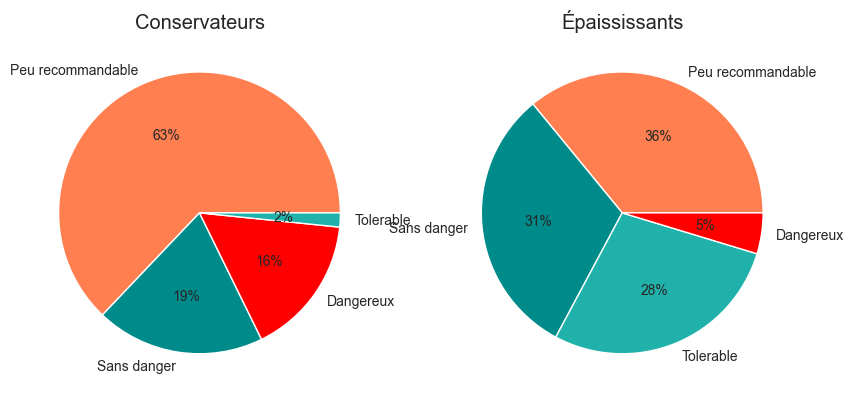

In [28]:
plt.figure(figsize=(10,10))
plt.subplot(121)
additifs[additifs['Famille']=='Conservateurs']['Note'].value_counts().plot(kind='pie',
                                                                 colors=['coral','DarkCyan','red','LightSeaGreen'],
                                                                 autopct='%1.0f%%',wedgeprops = { 'linewidth' : 1, 'edgecolor' : 'white' }, title='Conservateurs',ylabel='')
plt.subplot(122)
additifs[additifs['Famille']=='Épaississants']['Note'].value_counts().plot(kind='pie',
                                                                 colors=['coral','DarkCyan','LightSeaGreen','red'],
                                                              autopct='%1.0f%%',wedgeprops = { 'linewidth' : 1, 'edgecolor' : 'white' }, title='Épaississants', ylabel='')
plt.show()


					 TEST D'INDEPENDANCE DU CHI-2 




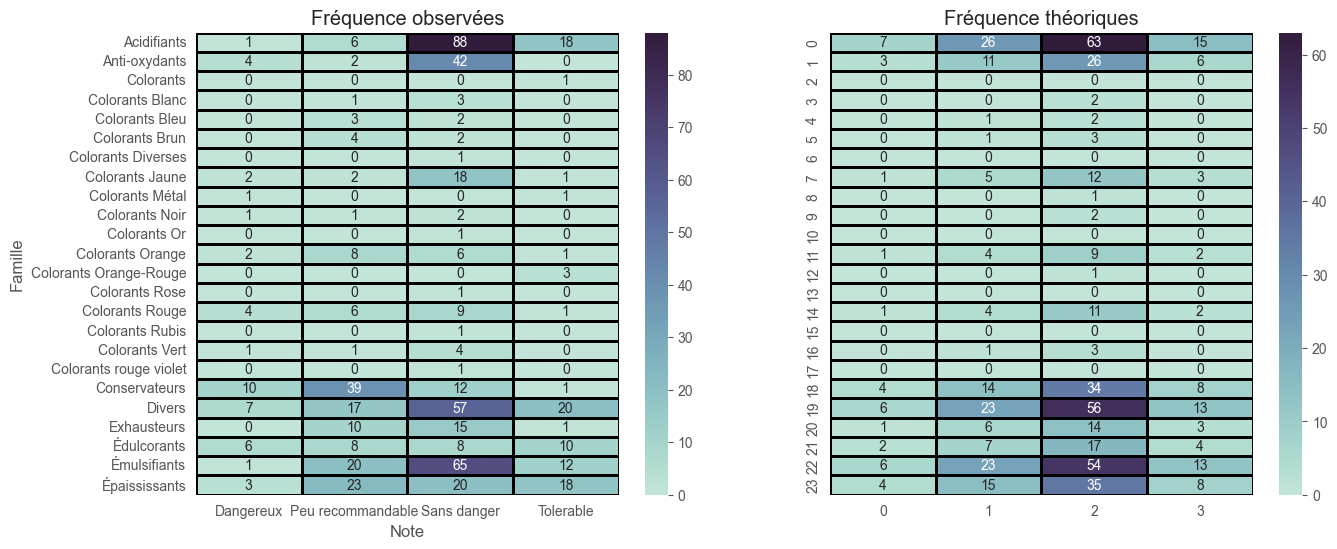


    		 ##### 0. Hypothèse du test  ##### 

    H0 : Famille et Note sont indépendantes 

    H1 : Famille et Note sont corrélées 
 
    
		 ##### 1. Paramètre du test ##### 
    Variables aléatoires étudiées : Famille et Note

    Indice de confiance alpha : 0.05 

    Degré de liberté : 69

    
		 ##### 2. Résultat du test du Qui-2  ##### 

    Coefficient du qui-2 : 257.57921469106003

    p-value calculée : 1.495692231541234e-23

    
		 ##### 3. Conclusion du test  ##### 
    
H0 est rejetée : Famille et Note sont corrélées significativement




					 TEST DE SIGNIFICATIVITE DE V CRAMER 


Le coefficient de Cramer est de : 0.3663 

    L'intensité du lien entre les variables est forte





In [30]:
tbx.chi2test(data=additifs, x='Famille', y='Note', alpha=0.05)